# OHLCV Anomaly Detection Tutorial

This notebook demonstrates how to detect anomalies in stock price data using chronos-lab.

## Setup

Install and import required libraries and define the list of tech stock symbols to analyze.

In [ ]:
!pip install chronos-lab[yfinance,analysis,visualization]

In [1]:
from chronos_lab.sources import ohlcv_from_yfinance
from chronos_lab.analysis import detect_ohlcv_anomalies
from chronos_lab.plot import plot_ohlcv_anomalies

symbols = [
    "AAPL", "MSFT", "GOOGL", "AMZN", "NVDA", "META", "TSLA", "ORCL", "AVGO", "INTC"
]

## Fetch Historical Data

Download one year of daily OHLCV data from Yahoo Finance for the selected symbols.

In [ ]:
ohlcv = ohlcv_from_yfinance(symbols=symbols, period='1y')

## Detect Anomalies

Run anomaly detection using Isolation Forest algorithm. This filters symbols with anomalies present within last 3 months and saves results to a dataset.

In [3]:
anomalies = detect_ohlcv_anomalies(ohlcv,
                                   return_ohlcv_df=True,
                                   anomaly_period_filter='3m',
                                   to_dataset="enabled",
                                   return_dag=True)

## Generate Plots

Create Bloomberg-style candlestick charts with highlighted anomalies for each symbol.

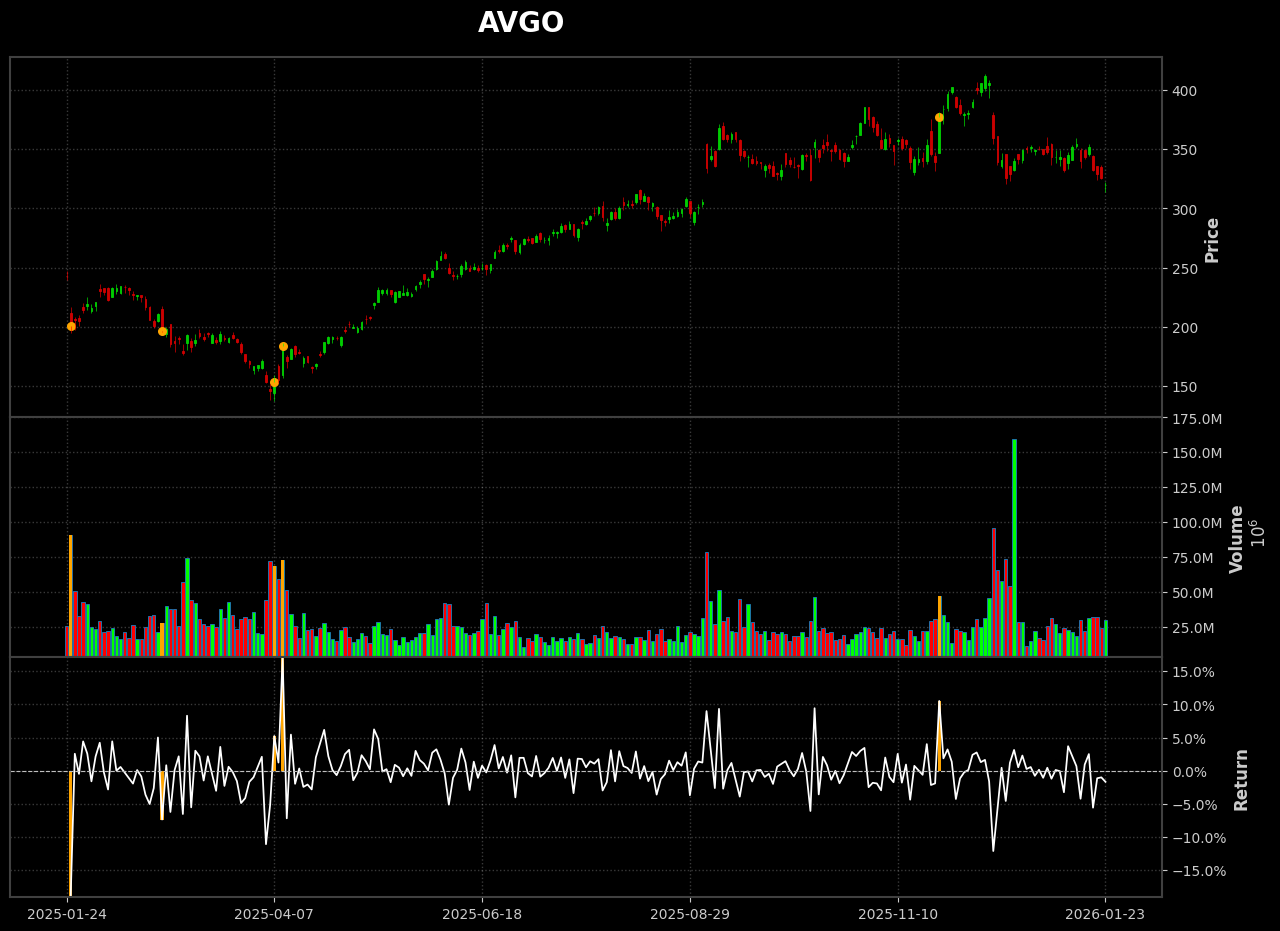

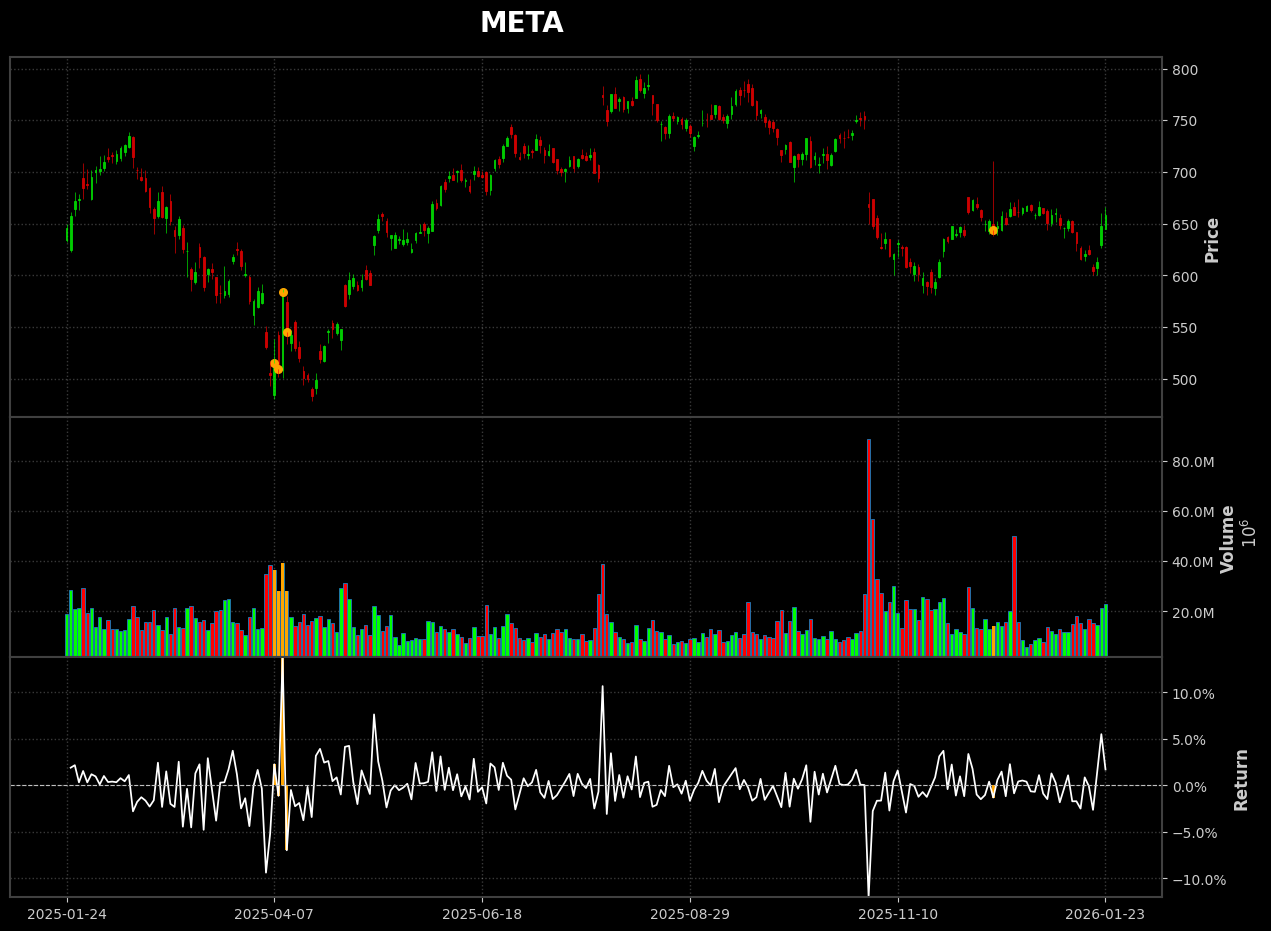

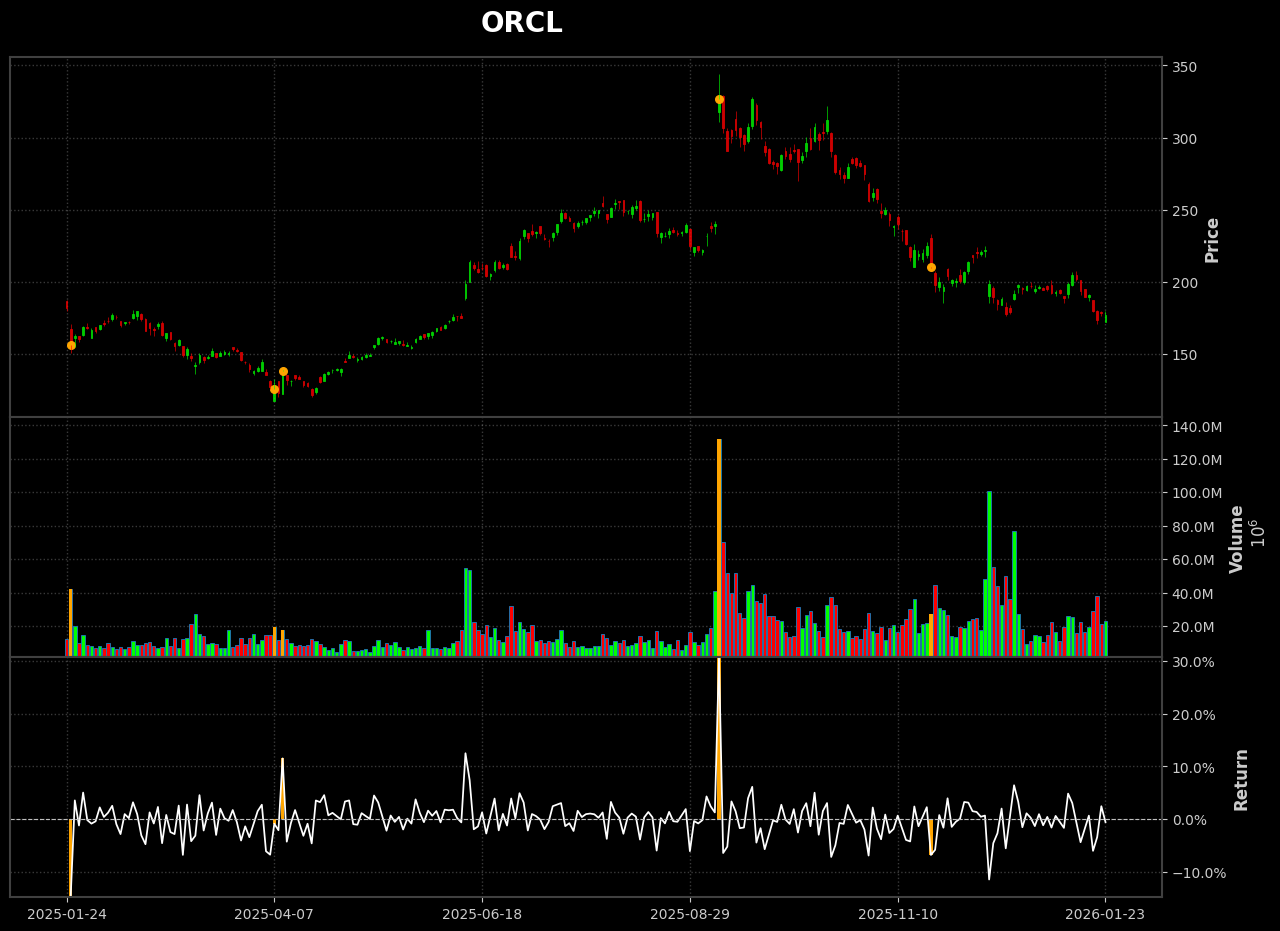

In [4]:
if 'filtered_anomalies_df' in anomalies:
    symbols_to_plot = anomalies['filtered_anomalies_df'].index.get_level_values('symbol').unique().to_list()
else:
    symbols_to_plot = anomalies['ohlcv_df'].index.get_level_values('symbol').unique().to_list()

for symbol in symbols_to_plot:
    ohlcv_anomalies_df = anomalies['ohlcv_df'].xs(symbol, level='symbol', drop_level=False)
    plot_data = plot_ohlcv_anomalies(ohlcv_anomalies_df)

## Inspect Calculation Pipeline

Dive into the complete execution graph powering the analysis. This visualization reveals every runtime input, transformation, and dependency that drives the anomaly detection pipeline from raw data to final results.


In [5]:
from IPython.display import HTML

g = anomalies['driver'].display_all_functions()

HTML(f"""
<div style="width:100%; overflow-x:auto; border:1px solid #ccc;">
    {g._repr_image_svg_xml()}
</div>
""")